In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploratory Data Analysis (EDA):

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
df.shape

(999, 10)

In [7]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [8]:
df.isnull().any()

RI      True
Na      True
Mg      True
Al      True
Si      True
K       True
Ca      True
Ba      True
Fe      True
Type    True
dtype: bool

<Axes: >

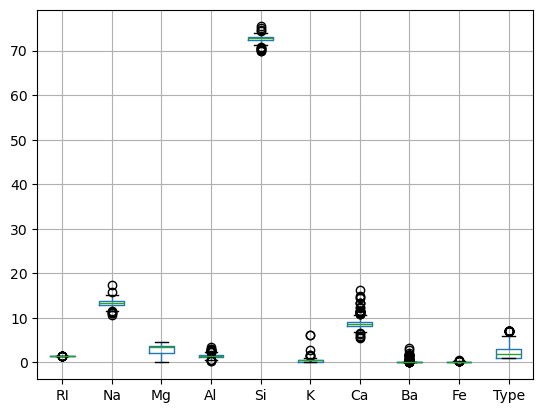

In [9]:
df.boxplot()

In [10]:
#from sklearn.impute import SimpleImputer

In [11]:
#Simple=SimpleImputer(missing_values=np.nan,strategy='mean')

In [12]:
#df=pd.DataFrame(Simple.fit_transform(df),columns=df.columns)

In [13]:
#df

In [14]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

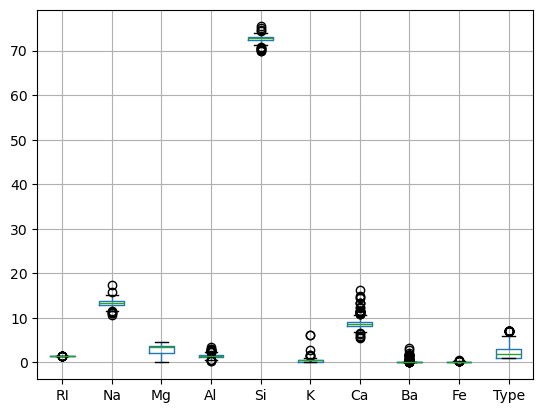

In [15]:
df.boxplot()
plt.show()

In [16]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

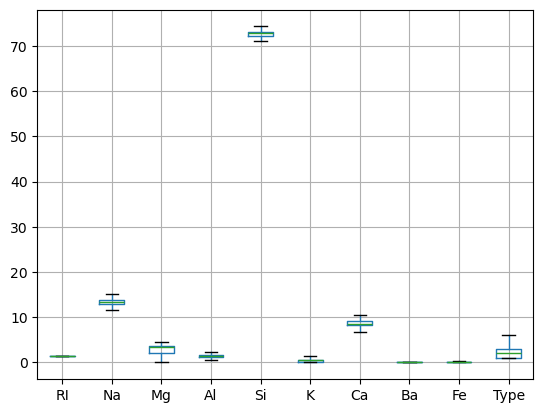

In [17]:
df.boxplot()
plt.show()

# 2: Data Visualization:

In [18]:
target=df[['Type']]

In [19]:
feature=df.drop(columns='Type')

In [20]:
target

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
994,NaN
995,NaN
996,NaN
997,NaN


In [21]:
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


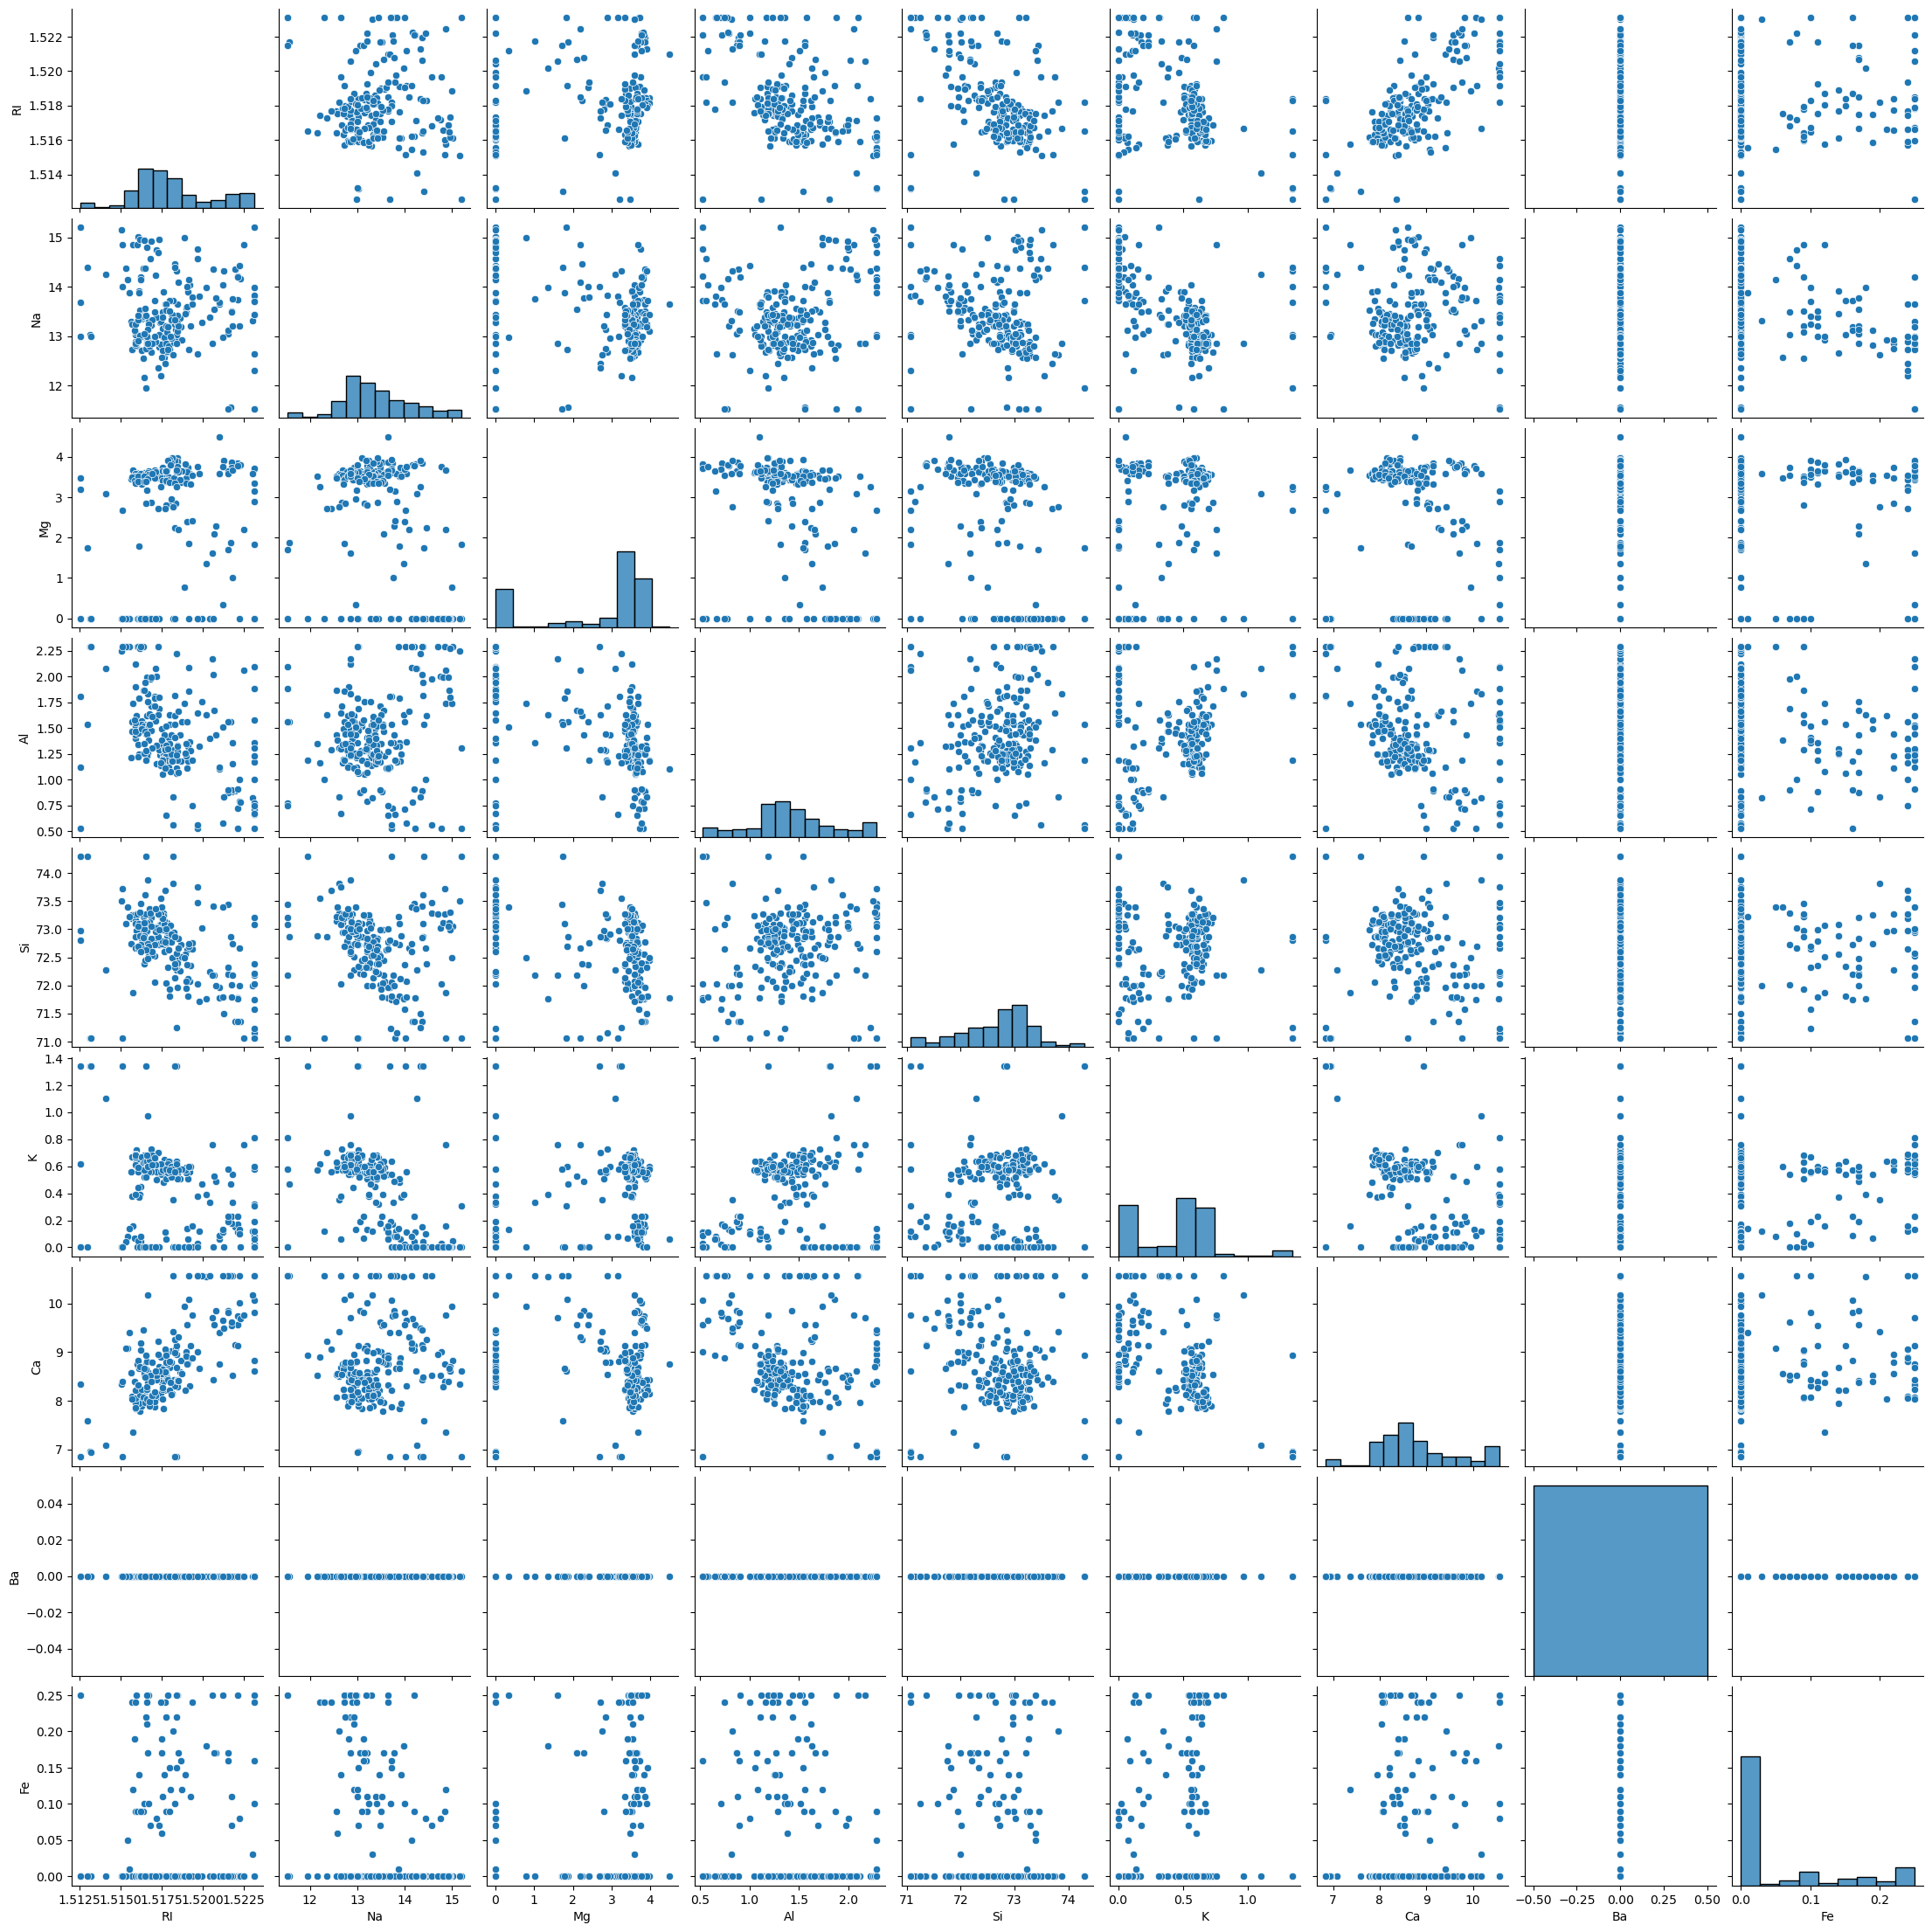

In [22]:
sns.pairplot(feature)
plt.show()

In [23]:
corr=df.corr()

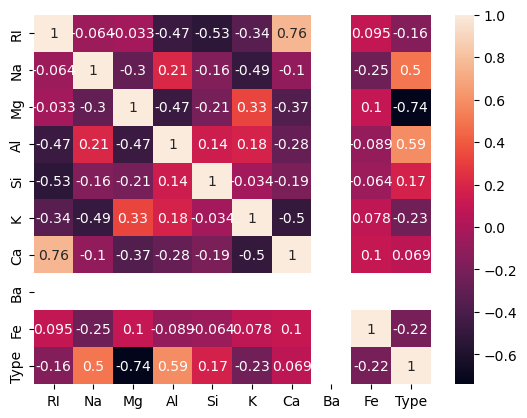

In [24]:
sns.heatmap(corr,annot=True)
plt.show()

# 3: Data Preprocessing

In [25]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [51]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0,6.0


In [59]:
target=df[['Type']]

In [61]:
target

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
209,6.0
210,6.0
211,6.0
212,6.0


In [65]:
feature=df.drop(columns='Type')

In [67]:
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0


In [73]:
cat_col=[i for i in df.columns if df[i].dtype=='O']

In [77]:
cat_col

[]

In [79]:
from sklearn.preprocessing import StandardScaler

In [81]:
std_sca=StandardScaler()

In [85]:
feature=pd.DataFrame(std_sca.fit_transform(feature),columns=feature.columns)

In [87]:
feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,0.0,-0.619091
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,0.0,-0.619091
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,0.0,-0.619091
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,0.0,-0.619091


# 4: Random Forest Model Implementation

In [91]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=150)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171, 1)
(43, 1)


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rand_for=RandomForestClassifier(n_estimators=100,max_features='sqrt',max_depth=None,max_samples=None,bootstrap=True,random_state=None)

In [119]:
rand_for

RandomForestClassifier()

In [121]:
rand_for.fit(x_train,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [123]:
y_pred=rand_for.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score

In [127]:
accuracy_score(y_test,y_pred)

0.8372093023255814

In [130]:
from sklearn.metrics import classification_report

In [132]:
y_test.value_counts()

Type
1.0     15
2.0     15
6.0      8
5.0      5
Name: count, dtype: int64

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.87      0.84        15
         2.0       0.79      0.73      0.76        15
         5.0       1.00      0.80      0.89         5
         6.0       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.84      0.84      0.84        43



# 5: Bagging and Boosting Methods

In [140]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [144]:
bagg_class=BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,bootstrap=True,max_features=0.9,max_samples=0.9,random_state=50)

In [146]:
bagg_class

BaggingClassifier(estimator=LogisticRegression(), max_features=0.9,
                  max_samples=0.9, n_estimators=100, random_state=50)

In [148]:
bagg_class.fit(x_train,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=LogisticRegression(), max_features=0.9,
                  max_samples=0.9, n_estimators=100, random_state=50)

In [152]:
y_pred=bagg_class.predict(x_test)

In [154]:
accuracy_score(y_test,y_pred)

0.7209302325581395

# Interview Questions: